In [1]:
from google.colab import files
import pandas as pd

# Upload file manually
uploaded = files.upload()

Saving athletic_apparel.csv to athletic_apparel.csv


In [2]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 13.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import re
import string
import emoji
import matplotlib.pyplot as plt

In [4]:
# Function to load CSV
def load_csv(file_path):
    return pd.read_csv(file_path)

# Function to check missing values
def check_missing_values(df):
    return df.isnull().sum()

# Function to clean text (lowercase, remove special characters and numbers)
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
        text = re.sub(r'\d+', '', text)  # Remove numbers
        return text.strip()
    return ""

# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    if isinstance(text, str):
        return " ".join([word for word in text.split() if word.lower() not in stop_words])
    return ""

# Function to lemmatize text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    if isinstance(text, str):
        return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return ""

# Function to tokenize words
def tokenize_words(text):
    if isinstance(text, str):
        return word_tokenize(text)
    return []

# Function to preprocess the dataframe
def preprocess_dataframe(df):
    df['clean_Title'] = df['Title'].apply(clean_text)
    df['clean_Body'] = df['Body'].apply(clean_text)
    df['clean_comments'] = df['comments'].apply(clean_text)

    df['clean_Title'] = df['clean_Title'].apply(remove_stopwords)
    df['clean_Body'] = df['clean_Body'].apply(remove_stopwords)
    df['clean_comments'] = df['clean_comments'].apply(remove_stopwords)

    df['clean_Title'] = df['clean_Title'].apply(lemmatize_text)
    df['clean_Body'] = df['clean_Body'].apply(lemmatize_text)
    df['clean_comments'] = df['clean_comments'].apply(lemmatize_text)

    df['tokenized_Title'] = df['clean_Title'].apply(tokenize_words)
    df['tokenized_Body'] = df['clean_Body'].apply(tokenize_words)
    df['tokenized_comments'] = df['clean_comments'].apply(tokenize_words)

    df['merged'] = df.apply(lambda row: np.concatenate([row['tokenized_Title'], row['tokenized_Body'], row['tokenized_comments']]), axis=1)

    return df

# Function to process CSV file
def process_csv(file_path):
    df = load_csv(file_path)
    print(f"Missing values in {file_path}:\n", check_missing_values(df))
    df = preprocess_dataframe(df)
    return df

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [6]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
df1 = process_csv('athletic_apparel.csv')


Missing values in athletic_apparel.csv:
 Title              0
Body            2834
Upvote_ratio       0
Timestamp          0
Upvote_num         0
comments           0
topic              0
dtype: int64


In [8]:
print(df1[['merged']].head())


                                              merged
0  [id, post, google, article, number, start, rem...
1  [taipeiexclusive, bubble, tea, samba, yay, nay...
2  [gazelle, indoor, burgundy, look, good, new, m...
3  [team, adidas, stan, smith, campus, definitely...
4          [concept, kick, x, adidas, aruku, strung]


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [10]:
# Function to load dataset
def load_dataset(file_path):
    return pd.read_csv(file_path)

# Function to combine text columns
def combine_text_columns(df, columns):
    df["text"] = df[columns].astype(str).agg(" ".join, axis=1)
    return df

# Function to replace emojis with words
def replace_emojis(text):
    return emoji.demojize(text, delimiters=(" ", " "))

# Function to preprocess text (Reusing previous text processing logic)
def preprocess_text(text):
    text = replace_emojis(text)  # Replace emojis with words
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words("english"))  # Define stopwords
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

# Function to apply text preprocessing
def preprocess_dataframe(df):
    df["cleaned_text"] = df["text"].apply(preprocess_text)
    return df

# Function to convert text into TF-IDF vectors
def vectorize_text(df, max_features=1000):
    vectorizer = TfidfVectorizer(max_features=max_features)
    X = vectorizer.fit_transform(df["cleaned_text"])
    return X, vectorizer

# Function to apply K-Means clustering
def apply_kmeans(X, num_clusters=3):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    return kmeans.fit_predict(X)

# Function to visualize clusters using PCA
def plot_clusters_pca(X, df):
    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X.toarray())  # Convert sparse matrix to array
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=df["Cluster"], cmap="viridis", alpha=0.7)
    plt.colorbar(scatter, label="Cluster")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("K-Means Clusters (PCA Reduced)")
    plt.show()

# Function to visualize cluster distribution
def plot_cluster_distribution(df, num_clusters):
    plt.figure(figsize=(8, 5))
    plt.hist(df["Cluster"], bins=num_clusters, edgecolor="black", alpha=0.7)
    plt.xlabel("Cluster Number")
    plt.ylabel("Frequency")
    plt.title("Distribution of Clusters")
    plt.show()

# Full pipeline function
def text_clustering_pipeline(file_path, text_columns, num_clusters=3):
    df = load_dataset(file_path)
    df = combine_text_columns(df, text_columns)
    df = preprocess_dataframe(df)
    X, _ = vectorize_text(df)
    df["Cluster"] = apply_kmeans(X, num_clusters)
    plot_clusters_pca(X, df)
    return df

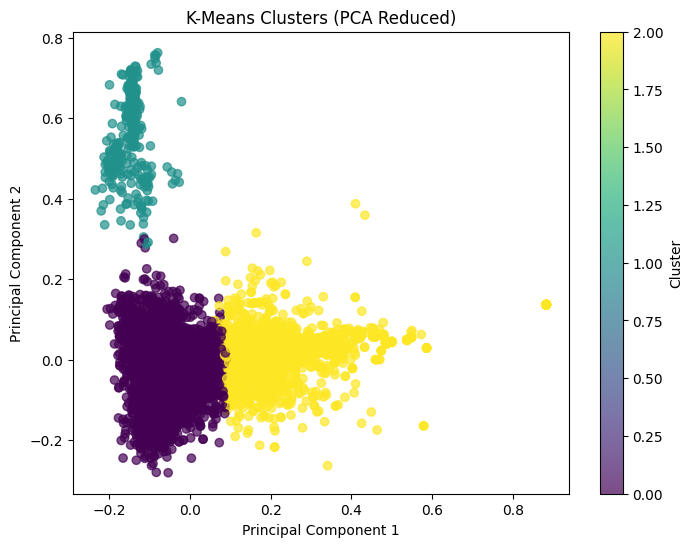

In [11]:
df1 = text_clustering_pipeline("athletic_apparel.csv", ["Title", "Body", "comments"], num_clusters=3)

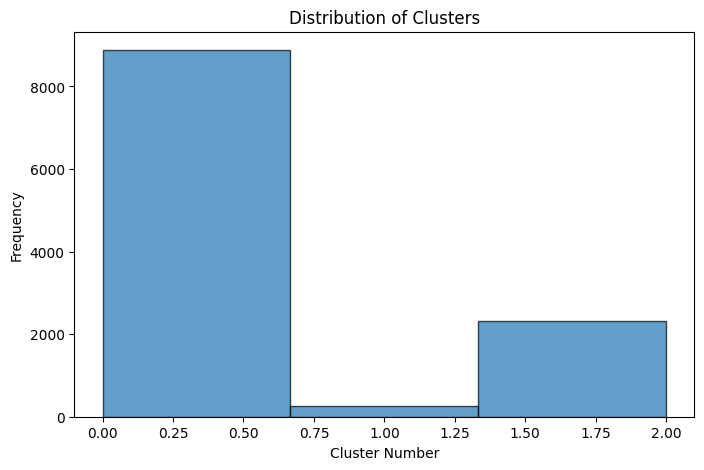

In [12]:
plot_cluster_distribution(df1, num_clusters=3)

In [13]:
bert_df=df1[['cleaned_text','Cluster']]
import tensorflow as tf
from tensorflow import keras
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
def preprocess_function(examples):
  return tokenizer(examples["cleaned_text"],padding=True,truncation=True,)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [14]:
tokenized_dataset= bert_df["cleaned_text"].apply(lambda x: tokenizer(x, padding=True, truncation=True))
bert_df["input_ids"] = tokenized_dataset.apply(lambda x: x["input_ids"])
bert_df["token_type_ids"] = tokenized_dataset.apply(lambda x: x["token_type_ids"])
bert_df["attention_mask"] = tokenized_dataset.apply(lambda x: x["attention_mask"])


<ipython-input-14-5eb792e13b83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_df["input_ids"] = tokenized_dataset.apply(lambda x: x["input_ids"])
<ipython-input-14-5eb792e13b83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_df["token_type_ids"] = tokenized_dataset.apply(lambda x: x["token_type_ids"])
<ipython-input-14-5eb792e13b83>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [15]:
bert_df

,cleaned_text,Cluster,input_ids,token_type_ids,attention_mask
0,id post google article number start nan remind...,0,"[101, 8909, 2695, 8224, 3720, 2193, 2707, 1666...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,taipeiexclusive bubble tea samba yay nay ’ pre...,0,"[101, 14004, 10288, 23633, 11957, 5572, 29086,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
2,gazelle indoor burgundy balloon nan look good ...,2,"[101, 3657, 6216, 7169, 18383, 13212, 16660, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,team adidas stan smith campus winkingface defi...,0,"[101, 2136, 27133, 8883, 9761, 3044, 3721, 168...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,concept kick x adidas aruku strung nan,2,"[101, 4145, 5926, 1060, 27133, 8883, 12098, 69...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
...,...,...,...,...,...
11453,hey guy would like share personal project work...,0,"[101, 4931, 3124, 2052, 2066, 3745, 3167, 2622...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
11454,new project rock gear know pr dropped yesterda...,0,"[101, 2047, 2622, 2600, 6718, 2113, 10975, 333...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
11455,men ’ compression shortsleggings pocket option...,0,"[101, 2273, 1521, 13379, 9132, 23115, 4726, 20...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
11456,name bag found model wearing men ua unstoppabl...,2,"[101, 2171, 4524, 2179, 2944, 4147, 2273, 2542...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [16]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

BATCH_SIZE = 8

# Step 1: Split dataset (80% train, 20% test)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    bert_df[["input_ids", "token_type_ids", "attention_mask"]],
    bert_df["Cluster"],
    test_size=0.2,
    random_state=42,
    stratify=bert_df["Cluster"]
)

# Step 2: Get max sequence length for padding
MAX_LEN = max(len(seq) for seq in bert_df["input_ids"])

# Step 3: Pad train and test sequences
train_input_ids = pad_sequences(train_texts["input_ids"].tolist(), maxlen=MAX_LEN, padding="post", dtype=np.int32)
train_token_type_ids = pad_sequences(train_texts["token_type_ids"].tolist(), maxlen=MAX_LEN, padding="post", dtype=np.int32)
train_attention_mask = pad_sequences(train_texts["attention_mask"].tolist(), maxlen=MAX_LEN, padding="post", dtype=np.int32)
train_labels = np.array(train_labels.tolist(), dtype=np.int32).squeeze()  # Ensure 1D integer labels

test_input_ids = pad_sequences(test_texts["input_ids"].tolist(), maxlen=MAX_LEN, padding="post", dtype=np.int32)
test_token_type_ids = pad_sequences(test_texts["token_type_ids"].tolist(), maxlen=MAX_LEN, padding="post", dtype=np.int32)
test_attention_mask = pad_sequences(test_texts["attention_mask"].tolist(), maxlen=MAX_LEN, padding="post", dtype=np.int32)
test_labels = np.array(test_labels.tolist(), dtype=np.int32).squeeze()

# Step 4: Correct `to_tf_dataset()` to use pre-padded arrays
def to_tf_dataset(input_ids, token_type_ids, attention_mask, labels):
    """
    Convert tokenized input data (already padded) and labels into a properly formatted TensorFlow dataset.
    """
    # Verify shapes before returning dataset
    print(f"input_ids shape: {input_ids.shape}, token_type_ids shape: {token_type_ids.shape}, attention_mask shape: {attention_mask.shape}, labels shape: {labels.shape}")

    # Create TensorFlow dataset
    return tf.data.Dataset.from_tensor_slices((
        {
            "input_ids": input_ids,
            "token_type_ids": token_type_ids,
            "attention_mask": attention_mask,
        },
        labels
    ))

# Step 5: Convert to TensorFlow dataset using **pre-padded** arrays
tf_train_dataset = to_tf_dataset(train_input_ids, train_token_type_ids, train_attention_mask, train_labels).shuffle(len(train_labels)).batch(BATCH_SIZE)
tf_test_dataset = to_tf_dataset(test_input_ids, test_token_type_ids, test_attention_mask, test_labels).batch(BATCH_SIZE)  # No shuffle for test


input_ids shape: (9166, 512), token_type_ids shape: (9166, 512), attention_mask shape: (9166, 512), labels shape: (9166,)
input_ids shape: (2292, 512), token_type_ids shape: (2292, 512), attention_mask shape: (2292, 512), labels shape: (2292,)


In [17]:
# Load BERT model with correct num_labels
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
model.summary()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109484547 (417.65 MB)
Trainable params: 109484547 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from transformers import create_optimizer

num_epochs = 3
batches_per_epoch = len(train_labels) // BATCH_SIZE
total_train_steps = int(batches_per_epoch * num_epochs)

optimizer, schedule = create_optimizer(init_lr=2e-5,num_warmup_steps=0, num_train_steps=total_train_steps)
model.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(from_logits=True),  # Correct loss function
    metrics=["accuracy"]
)



In [19]:
history = model.fit(
    tf_train_dataset,
    validation_data=tf_test_dataset,  # Use test set for validation
    epochs=num_epochs
)

Epoch 1/3
1146/1146 [==============================] - 1185s 991ms/step - loss: 0.1022 - accuracy: 0.9632 - val_loss: 0.0439 - val_accuracy: 0.9817
Epoch 2/3
1146/1146 [==============================] - 1136s 991ms/step - loss: 0.0208 - accuracy: 0.9928 - val_loss: 0.0313 - val_accuracy: 0.9865
Epoch 3/3
1146/1146 [==============================] - 1184s 1s/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0339 - val_accuracy: 0.9895


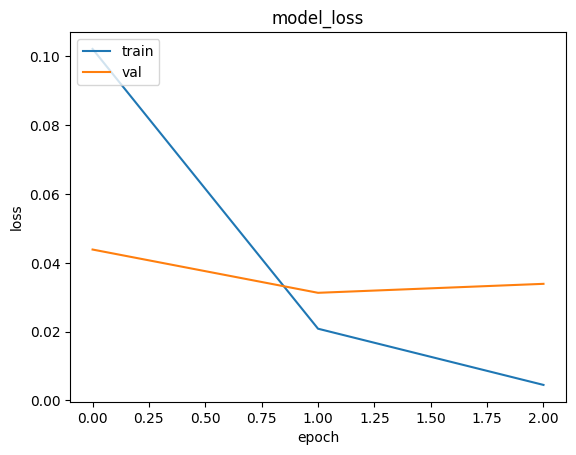

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


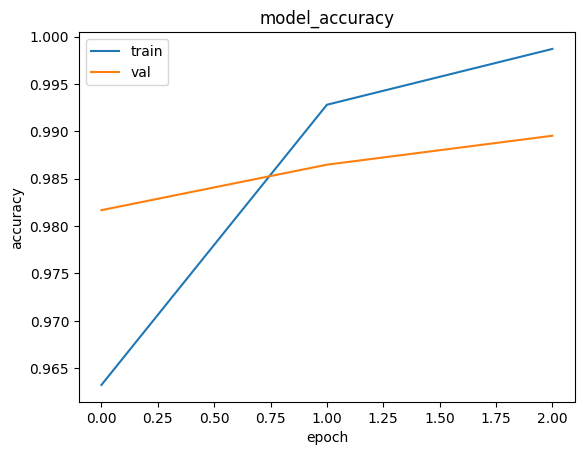

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()